In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import random
import cv2
import requests

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model
from PIL import Image

In [0]:
np.random.seed(0)

In [0]:
#loading the dataset
(X_train, y_train), (X_test, y_test)= mnist.load_data()

#Debugging stements
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
num_of_samples=[]
 
cols = 5
num_classes = 10
# Shows randomly parts of the training dataset

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))


In [0]:
# Shows the distribution of the data

print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
# Adding depth to our data
X_train = X_train.reshape(60000, 28, 28, 1) #depth of grayscale images is 1
X_test = X_test.reshape(10000, 28, 28, 1)

# Taking the data into a “binary“ format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Normalising the data
X_train = X_train/255
X_test = X_test/255

In [0]:
# System Architecture of a LeNet model based Convolutional Neural Network
# to decrase overfitting we add a dropout layer

def create_model():
  
  model = Sequential()
  model.add(Conv2D(filters=30, kernel_size=(5,5), input_shape=(28,28,1), activation='relu', strides=1))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(filters=15, kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr= 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
model = create_model()
print(model.summary())

W0716 10:55:17.264914 140678350247808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 10:55:17.299221 140678350247808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 10:55:17.307304 140678350247808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0716 10:55:17.335074 140678350247808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0716 10:55:17.376136 140678350247808 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
__________

In [0]:
history = model.fit(x=X_train, y=y_train,epochs=10, validation_split=0.1, batch_size=400,verbose=1, shuffle=1)

W0716 10:55:17.562337 140678350247808 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 8s 147us/step - loss: 0.2483 - acc: 0.9195 - val_loss: 0.0465 - val_acc: 0.9863
Epoch 2/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.0698 - acc: 0.9779 - val_loss: 0.0415 - val_acc: 0.9882
Epoch 3/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0631 - acc: 0.9805 - val_loss: 0.0579 - val_acc: 0.9835
Epoch 4/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.0527 - acc: 0.9838 - val_loss: 0.0378 - val_acc: 0.9900
Epoch 5/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0465 - acc: 0.9854 - val_loss: 0.0364 - val_acc: 0.9888
Epoch 6/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0403 - acc: 0.9879 - val_loss: 0.0305 - val_acc: 0.9905
Epoch 7/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0405 - acc: 0.9877 - val_loss: 0.0306 - val_acc

Text(0.5, 0, 'epoch')

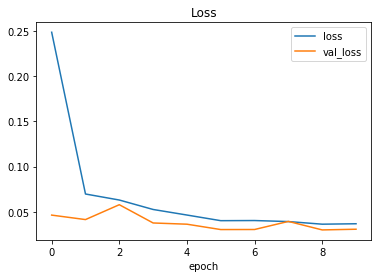

In [0]:
# Tracking the progress of the model

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
 

Text(0.5, 0, 'epoch')

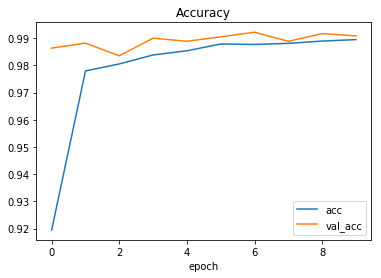

In [0]:
# Tracking the progress of the model

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

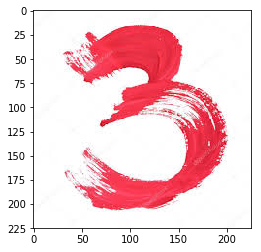

In [0]:

url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))



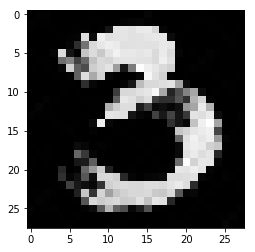

In [0]:

#Formatting the image to match the training sset style
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))



In [0]:
img = img/255
img = img.reshape(1, 28,28,1)


In [0]:
prediction = model.predict_classes(img)
print("The digit is ",str(prediction))


The digit is  [3]


In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.033722051779870026
Test accuracy: 0.99


In [0]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img),layer2.predict(img)


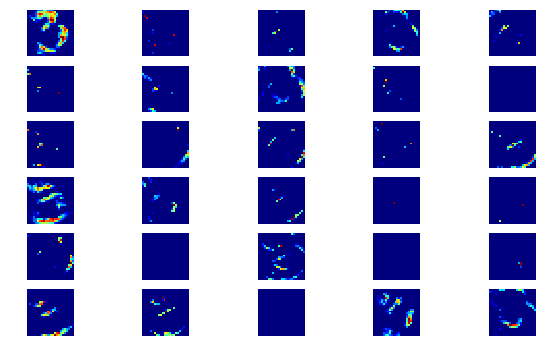

In [0]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6,5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap= plt.get_cmap('jet'))
  plt.axis('off')
  

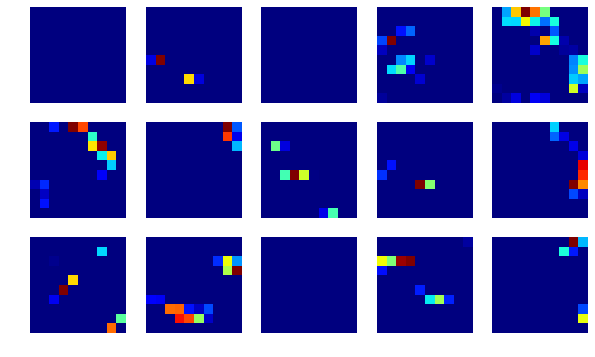

In [0]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3,5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap= plt.get_cmap('jet'))
  plt.axis('off')
  